# **DSL 24-1 기초 과제 2**

### 기수 : 11기
### 이름 : 송예원

In [ ]:
# 코랩에서 작성할 경우
from google.colab import drive
drive.mount('/content/drive')

필수 라이버러리 갖고오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **1**

해당 문제는 데이터를 전처리를 기초적으로 어떻게 하는지 알아보기 위해서 만들어진 문제입니다.

경로 설정 (turnout_2016.csv 으로 맞춰주세요!)

In [3]:
path_to_file = "/Users/yewonsong/desktop/DSL/과제/기초 과제 2/turnout_2016.csv"

다음과 같은 데이터는 2016년도에 미국 선거 관련 데이터입니다.

In [4]:
turnout = pd.read_csv(path_to_file)
turnout.head()

county fips             cand  st  pct_report     votes  total_votes  \
0    NaN   US     Donald Trump  US      0.9968  61195258    130180957   
1    NaN   US  Hillary Clinton  US      0.9968  62521739    130180957   
2    NaN   US     Gary Johnson  US      0.9968   4274900    130180957   
3    NaN   US       Jill Stein  US      0.9968   1316040    130180957   
4    NaN   US    Evan McMullin  US      0.9968    469770    130180957   

           lead       pct state.name  
0  Donald Trump  0.470078        NaN  
1  Donald Trump  0.480268        NaN  
2  Donald Trump  0.032838        NaN  
3  Donald Trump  0.010109        NaN  
4  Donald Trump  0.003609        NaN

In [5]:
turnout.columns

Index(['county', 'fips', 'cand', 'st', 'pct_report', 'votes', 'total_votes',
       'lead', 'pct', 'state.name'],
      dtype='object')

## **1-1**

state.name 컬럼을 살펴보면 값들이 다음과 같습니다.

In [6]:
turnout.value_counts('state.name', dropna = False)

state.name
Colorado          1430
Texas             1020
Iowa              1000
Louisiana          845
Minnesota          792
Kentucky           726
Tennessee          672
Virginia           670
Arkansas           608
Mississippi        581
Missouri           580
Wisconsin          511
Michigan           504
Georgia            480
Ohio               445
Kansas             424
Illinois           412
Florida            408
Nebraska           376
Idaho              360
Pennsylvania       340
South Carolina     329
North Dakota       324
North Carolina     303
Utah               300
California         295
Montana            285
Washington         280
West Virginia      280
Indiana            279
Alabama            272
New Mexico         272
South Dakota       268
New York           252
Oklahoma           234
New Jersey         198
Oregon             148
Wyoming            144
Nevada             108
Maryland           100
Vermont             90
Maine               68
Arizona             64


In [7]:
na_vals = turnout['state.name'].isna().sum()
print("NaN 값들의 갯수 : ", na_vals)

NaN 값들의 갯수 :  40


위와 같이 **NaN** 값들이 40 개가 있습니다. 해당 컬럼인 ***state.name*** 컬럼에서 **NaN** 값들을 없애주고, 완전히 없애졌는지 확인까지 해주시오.

In [18]:
test = turnout['state.name'].notna()
turnout = turnout[test]
turnout.reset_index(drop=True)

county   fips             cand  st  pct_report    votes  \
0                NaN     CA  Hillary Clinton  CA         1.0  7362490   
1                NaN     CA     Donald Trump  CA         1.0  3916209   
2                NaN     CA     Gary Johnson  CA         1.0   402406   
3                NaN     CA       Jill Stein  CA         1.0   220312   
4                NaN     CA   Gloria La Riva  CA         1.0    52900   
...              ...    ...              ...  ..         ...      ...   
18300    King County  48269       Jill Stein  TX         1.0        0   
18301  Loving County  48301     Donald Trump  TX         1.0       57   
18302  Loving County  48301  Hillary Clinton  TX         1.0        4   
18303  Loving County  48301       Jill Stein  TX         1.0        2   
18304  Loving County  48301     Gary Johnson  TX         1.0        1   

       total_votes             lead       pct  state.name  
0         11954317  Hillary Clinton  0.615885  California  
1         11954317  Hillary Clinton  0.327598  California  
2         11954317  Hillary Clinton  0.033662  California  
3         11954317  Hillary Clinton  0.018429  California  
4         11954317  Hillary Clinton  0.004425  California  
...            ...              ...       ...         ...  
18300          159     Donald Trump  0.000000       Texas  
18301           64     Donald Trump  0.890625       Texas  
18302           64     Donald Trump  0.062500       Texas  
18303           64     Donald Trump  0.031250       Texas  
18304           64     Donald Trump  0.015625       Texas  

[18305 rows x 10 columns]

없애졌는지 확인하기, True 가 나오면 아직 NaN 값들이 존재하며, False 가 나오면 NaN 값들이 사려졌다는 뜻입니다.

In [19]:
na_state = turnout['state.name'].isna().any()
print("NaN State : ", na_state)

NaN State :  False


## **1-2**

후보자들에 관한 데이터 수들을 다음과 같습니다.

In [21]:
turnout.value_counts('cand')

cand
Hillary Clinton              3161
Donald Trump                 3161
Gary Johnson                 3161
Jill Stein                   2644
Darrell Castle               1329
Rocky De La Fuente           1011
Evan McMullin                 805
Alyson Kennedy                406
Gloria La Riva                400
Jim Hedges                    224
Dan Vacek                     188
Lynn Kahn                     176
Mike Smith                    161
Emidio Soltysik               149
Chris Keniston                130
Laurence Kotlikoff            130
Tom Hoefling                  130
Monica Moorehead              125
Richard Duncan                 89
Rod Silva                      65
Ryan Scott                     65
Princess Jacob                 65
Joseph Maldonado               65
Michael Maturen                65
Kyle Kopitke                   65
Jerry White                    65
Frank Atwood                   65
Bradford Lyttle                65
Peter Skewes                   47
Scott Cop

모든 주에 대해서 가장 높은 투표 수를 가진 5명의 후보자들이 누구이며 각각 얼마나 많은 총 투표 수 (**votes**) 를 얻었는지에 대해서 알고 싶습니다. 전처리를 통해서 위의 결과를 도출하시오.

In [48]:
cand_votes = turnout.groupby('cand').count()
cand_votes.sort_values('votes',ascending=False,inplace=True)
cand_votes

county  fips    st  pct_report  votes  total_votes  \
cand                                                                            
Hillary Clinton              3111  3161  3161        3161   3161         3161   
Donald Trump                 3111  3161  3161        3161   3161         3161   
Gary Johnson                 3111  3161  3161        3161   3161         3161   
Jill Stein                   2600  2644  2644        2644   2644         2644   
Darrell Castle               1305  1329  1329        1329   1329         1329   
Rocky De La Fuente            991  1011  1011        1011   1011         1011   
Evan McMullin                 794   805   805         805    805          805   
Alyson Kennedy                399   406   406         406    406          406   
Gloria La Riva                392   400   400         400    400          400   
Jim Hedges                    221   224   224         224    224          224   
Dan Vacek                     186   188   188         188    188          188   
Lynn Kahn                     174   176   176         176    176          176   
Mike Smith                    159   161   161         161    161          161   
Emidio Soltysik               147   149   149         149    149          149   
Chris Keniston                128   130   130         130    130          130   
Laurence Kotlikoff            128   130   130         130    130          130   
Tom Hoefling                  128   130   130         130    130          130   
Monica Moorehead              122   125   125         125    125          125   
Richard Duncan                 88    89    89          89     89           89   
Rod Silva                      64    65    65          65     65           65   
Ryan Scott                     64    65    65          65     65           65   
Princess Jacob                 64    65    65          65     65           65   
Joseph Maldonado               64    65    65          65     65           65   
Michael Maturen                64    65    65          65     65           65   
Kyle Kopitke                   64    65    65          65     65           65   
Jerry White                    64    65    65          65     65           65   
Frank Atwood                   64    65    65          65     65           65   
Bradford Lyttle                64    65    65          65     65           65   
Peter Skewes                   46    47    47          47     47           47   
Scott Copeland                 44    45    45          45     45           45   
Rocky Giordani                 29    30    30          30     30           30   
 None of these candidates      17    18    18          18     18           18   

                           lead   pct  state.name  
cand                                               
Hillary Clinton            3161  3161        3161  
Donald Trump               3161  3161        3161  
Gary Johnson               3161  3161        3161  
Jill Stein                 2644  2644        2644  
Darrell Castle             1329  1329        1329  
Rocky De La Fuente         1011  1011        1011  
Evan McMullin               805   805         805  
Alyson Kennedy              406   406         406  
Gloria La Riva              400   400         400  
Jim Hedges                  224   224         224  
Dan Vacek                   188   188         188  
Lynn Kahn                   176   176         176  
Mike Smith                  161   161         161  
Emidio Soltysik             149   149         149  
Chris Keniston              130   130         130  
Laurence Kotlikoff          130   130         130  
Tom Hoefling                130   130         130  
Monica Moorehead            125   125         125  
Richard Duncan               89    89          89  
Rod Silva                    65    65          65  
Ryan Scott                   65    65          65  
Princess Jacob               65    65          65  
Joseph Maldonado        

In [50]:
cand_votes_top5 = cand_votes[:5]
cand_votes_top5 

county  fips    st  pct_report  votes  total_votes  lead  \
cand                                                                        
Hillary Clinton    3111  3161  3161        3161   3161         3161  3161   
Donald Trump       3111  3161  3161        3161   3161         3161  3161   
Gary Johnson       3111  3161  3161        3161   3161         3161  3161   
Jill Stein         2600  2644  2644        2644   2644         2644  2644   
Darrell Castle     1305  1329  1329        1329   1329         1329  1329   

                  pct  state.name  
cand                               
Hillary Clinton  3161        3161  
Donald Trump     3161        3161  
Gary Johnson     3161        3161  
Jill Stein       2644        2644  
Darrell Castle   1329        1329

## **1-3**

**1-2** 에서 구한 데이터를 시각화 시키고 싶습니다. 본인이 생각하는 가장 효과적인 시각화 방법을 선택 후 구현하시오. seaborn 과 matplotlib 의 pyplot 중에서 아무거나 선택하셔도 상관없습니다.

In [55]:
import matplotlib
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Top 5 Candidates')

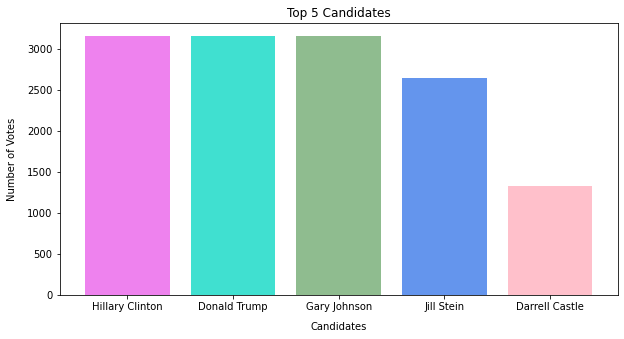

In [75]:
plt.figure(figsize=(10,5))
plt.bar(x=cand_votes_top5.index,height=cand_votes_top5['votes'],
        color = ['violet', 'turquoise', 'darkseagreen', 'cornflowerblue','pink'])
plt.xlabel("Candidates",labelpad=10.0)
plt.ylabel("Number of Votes",labelpad=10.0)
plt.title("Top 5 Candidates")


# **3**

spam.csv 와 spam_other.csv 에 대한 경로 설정을 우선적으로 해주세요!

In [31]:
path_to_spam = "/Users/yewonsong/desktop/DSL/과제/기초 과제 2/spam.csv"
path_to_spam_other = "/Users/yewonsong/desktop/DSL/과제/기초 과제 2/spam_other.csv"

## **3-1**

spam.csv 의 데이터는 다음과 같습니다.

In [32]:
spam = pd.read_csv(path_to_spam, index_col = 0)
spam

Spam State
No.                   
1                 Spam
2             Not Spam
3                 Spam
4                 Spam
5             Not Spam
6                 Spam
7             Not Spam
8             Not Spam
9                 Spam
10                Spam
11                Spam
12            Not Spam
13            Not Spam
14            Not Spam
15            Not Spam
16            Not Spam
17            Not Spam
18                Spam
19            Not Spam
20            Not Spam

정리를 하면 다음과 같이 나옵니다.

In [33]:
spam.value_counts()

Spam State
Not Spam      12
Spam           8
dtype: int64

힌트 :

X 를 spam.csv 라고 둔다면 P(X = Spam) = 8/20 = 0.4 이며 P(X = Not Spam) = 12/20 = 0.6 입니다.<br>
모든 x 에 대한 것이기 때문에 둘다 활용해서 푸시면 됩니다.

## **3-2**

spam_other.csv 의 데이터는 다음과 같습니다.

In [34]:
spam_other = pd.read_csv(path_to_spam_other, index_col = 0)
spam_other

Spam State
No.                   
1            Not Spam 
2            Not Spam 
3                 Spam
4                 Spam
5            Not Spam 
6                 Spam
7            Not Spam 
8                 Spam
9                 Spam
10                Spam
11                Spam
12                Spam
13           Not Spam 
14                Spam
15                Spam
16                Spam
17           Not Spam 
18           Not Spam 
19                Spam
20           Not Spam

정리를 하면 다음과 같습니다.

In [35]:
spam_other.value_counts()

Spam State
Spam          12
Not Spam       8
dtype: int64

힌트 :

1. P 를 spam.csv 에 대한 것으로 두며 Q 를 spam_other.csv 에 대한 것으로 둡니다.
2. P(X = Spam) = 8/20 = 0.4, Q(X = Spam) = 12/20 = 0.6
3. 이 값들을 KL-Divergence 공식에 대입 시켜줍니다.
4. X = Not Spam 에 대해서도 똑같이 해줍니다.